In [2]:
##General Imports
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model as lm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
%matplotlib inline

import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
##Imports 12 months of sampled cab data from a csv 
original_sample = pd.read_csv('Full_Processed_Sample')

In [29]:
sample = original_sample.sample(n=10000)
sample.head()

,Unnamed: 0,original_row_value,pickup_time,dropoff_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,date_object,month,year,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,October,November,December
51783,78236,8335855,2016-02-26 05:14:21,2016-02-26 05:27:12,1,3.90,-73.945625,40.777828,1,N,-73.991241,40.750412,1,13.5,0.5,0.5,4.40,0.0,0.3,19.20,0.325926,0,2016-02-26 05:14:21,2016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304183,467359,10787400,2015-09-29 21:20:15,2015-09-29 21:35:39,5,3.98,-74.011406,40.713573,1,N,-73.993523,40.696205,1,14.5,0.5,0.5,3.20,0.0,0.3,19.00,0.220690,0,2015-09-29 21:20:15,2015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
370530,572845,8635717,2015-10-22 22:52:48,2015-10-22 22:54:49,5,0.56,-73.973183,40.761726,1,N,-73.964287,40.758057,1,4.0,0.5,0.5,1.59,0.0,0.3,6.89,0.397500,0,2015-10-22 22:52:48,2015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
355738,549524,5395527,2015-10-14 22:42:08,2015-10-14 22:49:50,1,3.61,-74.014977,40.714333,1,N,-73.992470,40.698677,1,11.5,0.5,0.5,3.20,0.0,0.3,16.00,0.278261,0,2015-10-14 22:42:08,2015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
185100,278838,5585220,2016-05-15 03:30:28,2016-05-15 03:52:40,1,6.30,-73.999863,40.728516,1,N,-73.922638,40.762669,1,21.0,0.5,0.5,2.50,0.0,0.3,24.80,0.119048,0,2016-05-15 03:30:28,2016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
sample = sample[sample.dropoff_longitude < 0]
sample.head()

,Unnamed: 0,original_row_value,pickup_time,dropoff_time,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,date_object,month,year,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,October,November,December,cluster
51783,78236,8335855,2016-02-26 05:14:21,2016-02-26 05:27:12,1,3.90,-73.945625,40.777828,1,N,-73.991241,40.750412,1,13.5,0.5,0.5,4.40,0.0,0.3,19.20,0.325926,0,2016-02-26 05:14:21,2016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
304183,467359,10787400,2015-09-29 21:20:15,2015-09-29 21:35:39,5,3.98,-74.011406,40.713573,1,N,-73.993523,40.696205,1,14.5,0.5,0.5,3.20,0.0,0.3,19.00,0.220690,0,2015-09-29 21:20:15,2015,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
370530,572845,8635717,2015-10-22 22:52:48,2015-10-22 22:54:49,5,0.56,-73.973183,40.761726,1,N,-73.964287,40.758057,1,4.0,0.5,0.5,1.59,0.0,0.3,6.89,0.397500,0,2015-10-22 22:52:48,2015,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
355738,549524,5395527,2015-10-14 22:42:08,2015-10-14 22:49:50,1,3.61,-74.014977,40.714333,1,N,-73.992470,40.698677,1,11.5,0.5,0.5,3.20,0.0,0.3,16.00,0.278261,0,2015-10-14 22:42:08,2015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
185100,278838,5585220,2016-05-15 03:30:28,2016-05-15 03:52:40,1,6.30,-73.999863,40.728516,1,N,-73.922638,40.762669,1,21.0,0.5,0.5,2.50,0.0,0.3,24.80,0.119048,0,2016-05-15 03:30:28,2016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [63]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.01, min_samples=50)

In [64]:
db.fit(sample[['dropoff_longitude','dropoff_latitude']])

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    min_samples=50, p=None, random_state=None)

In [65]:
sample['cluster'] = db.labels_

In [66]:
sample.groupby('cluster').mean()

,Unnamed: 0,original_row_value,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tiprate,tiprate_zero,month,year,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Verifone,tiprate_large,tiprate_small,tiprate_medium,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,February,March,April,May,June,July,August,October,November,December
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,337762.556940,5.674367e+06,1.599644,8.235783,-73.958344,40.738883,1.279359,-73.937980,40.732504,1.0,29.503559,0.400356,0.464413,5.486940,1.680018,0.3,37.835285,0.190950,0.099644,2015.528470,0.140569,0.137011,0.185053,0.177936,0.113879,0.122776,0.537367,0.656584,0.085409,0.147687,0.064057,0.042705,0.048043,0.035587,0.008897,0.028470,0.021352,0.021352,0.028470,0.019573,0.033808,0.021352,0.024911,0.023132,0.023132,0.019573,0.026690,0.039146,0.040925,0.067616,0.090747,0.088968,0.088968,0.090747,0.083630,0.083630,0.096085,0.094306,0.083630,0.067616,0.081851,0.081851,0.078292,0.078292
0,344433.451230,5.751332e+06,1.659056,2.554237,-73.975927,40.750941,1.018954,-73.980702,40.752005,1.0,11.745877,0.321714,0.499501,2.377472,0.187287,0.3,15.431850,0.210393,0.036134,2015.509865,0.140324,0.153403,0.149413,0.145201,0.149302,0.129129,0.531368,0.723121,0.046996,0.186766,0.026823,0.017845,0.011195,0.008646,0.007315,0.021281,0.042230,0.052538,0.049324,0.043449,0.042563,0.051097,0.046996,0.046885,0.047550,0.038129,0.053203,0.061738,0.065728,0.060075,0.064066,0.061627,0.044558,0.089005,0.089226,0.082687,0.086899,0.083241,0.078031,0.075593,0.077921,0.092219,0.084460,0.081911
1,342721.209677,5.838311e+06,1.983871,4.990000,-73.971299,40.746714,1.000000,-73.923268,40.764843,1.0,18.677419,0.459677,0.500000,3.471290,0.089355,0.3,23.497742,0.191948,0.080645,2015.516129,0.096774,0.112903,0.096774,0.193548,0.145161,0.274194,0.532258,0.645161,0.064516,0.209677,0.064516,0.064516,0.129032,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048387,0.000000,0.000000,0.000000,0.032258,0.112903,0.032258,0.048387,0.080645,0.080645,0.129032,0.064516,0.096774,0.048387,0.193548,0.048387,0.096774,0.096774,0.096774,0.048387,0.048387,0.096774
2,350361.696203,5.831920e+06,1.632911,9.998038,-73.973667,40.754296,1.025316,-73.869267,40.772145,1.0,31.585443,0.205696,0.496835,7.248291,4.462025,0.3,44.298291,0.230841,0.018987,2015.493671,0.113924,0.177215,0.183544,0.189873,0.145570,0.082278,0.544304,0.778481,0.031646,0.170886,0.012658,0.006329,0.000000,0.031646,0.069620,0.063291,0.044304,0.069620,0.031646,0.050633,0.069620,0.088608,0.063291,0.088608,0.107595,0.094937,0.031646,0.037975,0.006329,0.006329,0.012658,0.000000,0.000000,0.069620,0.075949,0.107595,0.107595,0.063291,0.063291,0.107595,0.094937,0.101266,0.050633,0.088608
3,332360.661765,5.012519e+06,1.941176,17.433676,-73.969116,40.747779,1.941176,-73.784759,40.644869,1.0,51.477941,0.242647,0.500000,10.966324,3.992059,0.3,67.478971,0.212764,0.029412,2015.573529,0.191176,0.117647,0.205882,0.102941,0.147059,0.117647,0.558824,0.735294,0.073529,0.147059,0.000000,0.014706,0.000000,0.044118,0.132353,0.117647,0.073529,0.029412,0.058824,0.029412,0.029412,0.044118,0.073529,0.073529,0.029412,0.073529,0.029412,0.058824,0.029412,0.000000,0.029412,0.014706,0.014706,0.117647,0.088235,0.058824,0.058824,0.117647,0.044118,0.058824,0.044118,0.058824,0.088235,0.132353


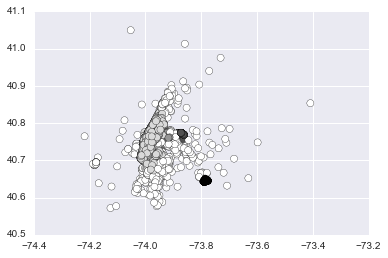

In [67]:
plt.scatter(sample['dropoff_longitude'], sample['dropoff_latitude'], c=sample.cluster, s=50)